# Head

In [1]:
import pandas as pd
from pathlib import Path
home = Path.home()

# models = ['gemma3', 'llama4', 'qwen3']
models = ['gemma3', 'llama4']

# suffixes = None
suffixes = '_sent_shuffle'
# suffixes = '_tail'
if suffixes is not None:
    csv_files = [home / f'projects/TLDR/data/paper_html_10.1038/abs_annotation/generated_annotations/{model}{suffixes}.txt' for model in models]
else:
    csv_files = [home / f'projects/TLDR/data/paper_html_10.1038/abs_annotation/generated_annotations/{model}.txt' for model in models]

df = pd.read_csv(home / 'projects/TLDR/data/paper_html_10.1038/abs_annotation/test.tsv', sep='\t')
for model, csv_file in zip(models, csv_files):
    single_df = pd.read_csv(csv_file, sep='\t', header=None, names=[model])
    df = df.join(single_df)

for index in pd.read_csv(home / "projects/TLDR/description/invalid_entry_in_test.txt", sep='\t', header=None).values.flatten().tolist():
    df = df.drop(index-2)  # Adjusting for zero-based index
df

,doi,paper_id,abstract,annotation,gemma3,llama4
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This reference reports on phylogenetic relatio...,These results provide evidence that modern cat...
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study demonstrates that European domestic...,These findings provide evidence for independen...
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This reference details a fine-mapping strategy...,The authors fine-map a QTL for milk fat percen...
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This paper reports high levels of linkage dise...,This study is among the first to examine the e...
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This work describes a QTL mapping study of a w...,This study mapped genetic loci associated with...
...,...,...,...,...,...,...
35631,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This work shows that Tregs from type 1 diabeti...,This study highlights the challenges of transl...
35632,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study demonstrates that engineered IL-2 r...,These findings suggest that engineering cytoki...
35633,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identified that autoreactive T cell...,T cells recognize a unique type of antigen tha...
35634,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This report describes a novel genome editing a...,This study demonstrated that human ESCs and iP...


# Load publication venue and year from MAG

In [2]:
import pickle
print("Loading doi_mag_pid_dict...")
with open(home / "projects/TLDR/data/doi_mag_pid_dict.pkl", "rb") as f:
    doi_mag_pid_dict = pickle.load(f)
    print("doi_mag_pid_dict loaded.")

df['mag_pid'] = df['doi'].map(doi_mag_pid_dict)
df = df.dropna(subset=['mag_pid'])
df.loc[:, 'mag_pid'] = df['mag_pid'].apply(lambda x: x.split(';')[0] if isinstance(x, str) else x)
df.loc[:, 'mag_pid'] = df['mag_pid'].astype(int)
display(df)

Loading doi_mag_pid_dict...
doi_mag_pid_dict loaded.


,doi,paper_id,abstract,annotation,gemma3,llama4,mag_pid
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This reference reports on phylogenetic relatio...,These results provide evidence that modern cat...,2005395185
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study demonstrates that European domestic...,These findings provide evidence for independen...,2110049233
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This reference details a fine-mapping strategy...,The authors fine-map a QTL for milk fat percen...,2082900742
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This paper reports high levels of linkage dise...,This study is among the first to examine the e...,2103106090
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This work describes a QTL mapping study of a w...,This study mapped genetic loci associated with...,2045457895
...,...,...,...,...,...,...,...
35631,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This work shows that Tregs from type 1 diabeti...,This study highlights the challenges of transl...,2137227986
35632,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study demonstrates that engineered IL-2 r...,These findings suggest that engineering cytoki...,2789780246
35633,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identified that autoreactive T cell...,T cells recognize a unique type of antigen tha...,2266478788
35634,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This report describes a novel genome editing a...,This study demonstrated that human ESCs and iP...,2943378944


In [3]:
MAG_paper_df = pd.read_parquet(home / 'projects/TLDR/data/MAG_paper.parquet')
df = df.merge(MAG_paper_df[['VenueID', 'Year']], left_on='mag_pid', right_index=True, how='inner')
df.rename(columns={'VenueID': 'mag_vid', 'Year': 'year'}, inplace=True)
display(df)

,doi,paper_id,abstract,annotation,gemma3,llama4,mag_pid,mag_vid,year
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This reference reports on phylogenetic relatio...,These results provide evidence that modern cat...,2005395185,125754415,1994
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study demonstrates that European domestic...,These findings provide evidence for independen...,2110049233,65932378,2000
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This reference details a fine-mapping strategy...,The authors fine-map a QTL for milk fat percen...,2082900742,125754415,1999
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This paper reports high levels of linkage dise...,This study is among the first to examine the e...,2103106090,43092948,2000
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This work describes a QTL mapping study of a w...,This study mapped genetic loci associated with...,2045457895,3880285,1994
...,...,...,...,...,...,...,...,...,...
35631,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This work shows that Tregs from type 1 diabeti...,This study highlights the challenges of transl...,2137227986,129060628,2009
35632,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study demonstrates that engineered IL-2 r...,These findings suggest that engineering cytoki...,2789780246,3880285,2018
35633,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identified that autoreactive T cell...,T cells recognize a unique type of antigen tha...,2266478788,3880285,2016
35634,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This report describes a novel genome editing a...,This study demonstrated that human ESCs and iP...,2943378944,125754415,2019


# Load subject label

In [4]:
label_df = pd.read_parquet(home / 'projects/TLDR/data/cluster_df.parquet')
label_df

,Scopus_label,movMF_label,movMF_distance,x_val,y_val,kmeans_label,kmeans_distance,skm_label,skm_distance,spectral_label,n2v_kmeans_label,cm_kmeans_label,gnn_kmeans_label,bert_kmeans_label
202381698,Multidisciplinary,22,0.445886,-67.928200,15.572327,17,0.628846,20,0.444711,24,3,21,0,0
137773608,Multidisciplinary,22,0.590942,-68.405334,-55.633186,17,0.735654,20,0.559494,24,20,21,0,3
125754415,Multidisciplinary,22,0.574571,-68.448853,-55.613579,17,0.705024,20,0.550081,24,20,21,0,0
3880285,Multidisciplinary,23,0.618842,-68.407288,-55.634430,8,0.724859,17,0.610582,24,20,21,0,3
111155417,Chemistry,23,0.220853,-54.506985,-61.217068,11,0.495787,12,0.198758,14,4,24,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764485818,Medicine,21,0.268070,-28.969574,34.819569,18,0.542531,14,0.251015,8,18,1,19,1
83454320,Arts and Humanities,25,0.034777,78.609909,31.736822,13,0.251599,3,0.056642,21,5,1,14,1
16507453,Arts and Humanities,6,0.113656,89.206772,17.625090,13,0.307089,3,0.128660,21,5,1,14,1
121509672,Agricultural and Biological Sciences,5,0.179111,-36.757057,-0.591017,21,0.430040,16,0.207435,10,5,1,10,1


In [5]:
df = df.merge(label_df[['kmeans_label', 'Scopus_label']], left_on='mag_vid', right_index=True, how='inner')
df.rename(columns={'kmeans_label': 'p2v_label', 'Scopus_label': 'scopus_label'}, inplace=True)
df

,doi,paper_id,abstract,annotation,gemma3,llama4,mag_pid,mag_vid,year,p2v_label,scopus_label
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This reference reports on phylogenetic relatio...,These results provide evidence that modern cat...,2005395185,125754415,1994,17,Multidisciplinary
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study demonstrates that European domestic...,These findings provide evidence for independen...,2110049233,65932378,2000,17,"Biochemistry, Genetics and Molecular Biology"
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This reference details a fine-mapping strategy...,The authors fine-map a QTL for milk fat percen...,2082900742,125754415,1999,17,Multidisciplinary
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This paper reports high levels of linkage dise...,This study is among the first to examine the e...,2103106090,43092948,2000,17,"Biochemistry, Genetics and Molecular Biology"
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This work describes a QTL mapping study of a w...,This study mapped genetic loci associated with...,2045457895,3880285,1994,8,Multidisciplinary
...,...,...,...,...,...,...,...,...,...,...,...
35631,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This work shows that Tregs from type 1 diabeti...,This study highlights the challenges of transl...,2137227986,129060628,2009,17,Medicine
35632,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study demonstrates that engineered IL-2 r...,These findings suggest that engineering cytoki...,2789780246,3880285,2018,8,Multidisciplinary
35633,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identified that autoreactive T cell...,T cells recognize a unique type of antigen tha...,2266478788,3880285,2016,8,Multidisciplinary
35634,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This report describes a novel genome editing a...,This study demonstrated that human ESCs and iP...,2943378944,125754415,2019,17,Multidisciplinary


In [41]:
df['p2v_label'].value_counts()

p2v_label
17    18439
8      9625
6      1457
7      1028
4       627
9       611
11      580
22      404
18      363
21      319
12      292
20      121
1        60
3        49
14       32
5        25
24       21
16       21
15       17
2        16
23       16
0        10
19        6
13        5
25        2
Name: count, dtype: int64

In [8]:
df['scopus_label'].value_counts()

scopus_label
Multidisciplinary                               15639
Medicine                                         5262
Immunology and Microbiology                      4146
Biochemistry, Genetics and Molecular Biology     4116
Chemistry                                        1285
Neuroscience                                     1211
Agricultural and Biological Sciences              704
Social Sciences                                   608
Earth and Planetary Sciences                      235
Materials Science                                 179
Psychology                                        156
Physics and Astronomy                             139
Pharmacology, Toxicology and Pharmaceutics        128
Environmental Science                             119
Energy                                             39
Mathematics                                        30
Engineering                                        28
Computer Science                                   24
Nursing        

# Predict subject

## 10-fold cv

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate, StratifiedKFold
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

# text_features = ['abstract', 'annotation', 'deepseek_v3', 'qwen3','gemma3', 'llama4', 'qwq']
text_features = models + ['annotation', 'abstract']
y = (df['p2v_label'] == 17).astype(int)  # 17为1，否则为0

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1']

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    X_text = df[feat].astype(str).fillna('')
    vectorizer = ProgressHashingVectorizer(n_features=2**18, stop_words='english', alternate_sign=False)
    X = vectorizer.transform(X_text)
    clf = MultinomialNB()
    scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, n_jobs=-1, verbose=1)
    res = {
        'feature': feat,
        'accuracy_mean': scores['test_accuracy'].mean(),
        'accuracy_std': scores['test_accuracy'].std(),
        'precision_mean': scores['test_precision'].mean(),
        'precision_std': scores['test_precision'].std(),
        'recall_mean': scores['test_recall'].mean(),
        'recall_std': scores['test_recall'].std(),
        'f1_mean': scores['test_f1'].mean(),
        'f1_std': scores['test_f1'].std(),
    }
    print(
        f"Feature: {feat} | "
        f"Acc: {res['accuracy_mean']:.4f}±{res['accuracy_std']:.4f} | "
        f"Precision: {res['precision_mean']:.4f}±{res['precision_std']:.4f} | "
        f"Recall: {res['recall_mean']:.4f}±{res['recall_std']:.4f} | "
        f"F1: {res['f1_mean']:.4f}±{res['f1_std']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
results_df

Processing feature: gemma3


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 34146/34146 [00:00<00:00, 93187.77it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.4s finished


Feature: gemma3 | Acc: 0.6587±0.0061 | Precision: 0.6287±0.0040 | Recall: 0.8987±0.0075 | F1: 0.7398±0.0049
Processing feature: llama4


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 34146/34146 [00:00<00:00, 71788.10it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished


Feature: llama4 | Acc: 0.6488±0.0055 | Precision: 0.6210±0.0040 | Recall: 0.8969±0.0049 | F1: 0.7339±0.0038
Processing feature: annotation


Vectorizing documents: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 34146/34146 [00:00<00:00, 111279.23it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


Feature: annotation | Acc: 0.6411±0.0043 | Precision: 0.6133±0.0028 | Recall: 0.9076±0.0078 | F1: 0.7320±0.0036
Processing feature: abstract


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 34146/34146 [00:02<00:00, 16560.78it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.


Feature: abstract | Acc: 0.6962±0.0039 | Precision: 0.6544±0.0022 | Recall: 0.9270±0.0074 | F1: 0.7672±0.0035


[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished


,feature,accuracy_mean,accuracy_std,precision_mean,precision_std,recall_mean,recall_std,f1_mean,f1_std
0,gemma3,0.658702,0.006141,0.628717,0.004039,0.898693,0.007472,0.739838,0.004856
1,llama4,0.648774,0.005533,0.621047,0.004037,0.896903,0.004904,0.733902,0.003784
2,annotation,0.641100,0.004256,0.613316,0.002769,0.907641,0.007798,0.731988,0.003620
3,abstract,0.696246,0.003894,0.654427,0.002232,0.927002,0.007353,0.767215,0.003539


## no cv

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

text_features = ['abstract', 'annotation', 'deepseek_v3', 'gemma3', 'llama4', 'qwq']
# 二分类标签：是否为17
y = (df['p2v_label'] == 17).astype(int)  # 17为1，否则为0

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    X_text = df[feat].astype(str).fillna('')
    X_train, X_test, y_train, y_test = train_test_split(
        X_text, y, test_size=0.1, random_state=42, stratify=y
    )

    vectorizer = ProgressHashingVectorizer(n_features=2**18, stop_words='english', alternate_sign=False)
    X_train_vec = vectorizer.transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    clf = MultinomialNB()
    clf.fit(X_train_vec, y_train)
    y_pred = clf.predict(X_test_vec)

    res = {
        'feature': feat,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
    }
    print(
        f"Feature: {feat} | "
        f"Accuracy: {res['accuracy']:.4f} | "
        f"Precision: {res['precision']:.4f} | "
        f"Recall: {res['recall']:.4f} | "
        f"F1: {res['f1']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
results_df

Processing feature: abstract


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 21465.83it/s]


Feature: abstract | Accuracy: 0.6972 | Precision: 0.6540 | Recall: 0.9328 | F1: 0.7689
Processing feature: annotation


Vectorizing documents: 100%|████████████████████████████████████████████| 3415/3415 [00:00<00:00, 137783.39it/s]


Feature: annotation | Accuracy: 0.6442 | Precision: 0.6150 | Recall: 0.9121 | F1: 0.7347
Processing feature: deepseek_v3


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 73381.46it/s]


Feature: deepseek_v3 | Accuracy: 0.6656 | Precision: 0.6333 | Recall: 0.9046 | F1: 0.7450
Processing feature: gemma3


Vectorizing documents: 100%|████████████████████████████████████████████| 3415/3415 [00:00<00:00, 110159.96it/s]


Feature: gemma3 | Accuracy: 0.6723 | Precision: 0.6389 | Recall: 0.9040 | F1: 0.7487
Processing feature: llama4


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 84019.43it/s]


Feature: llama4 | Accuracy: 0.6624 | Precision: 0.6299 | Recall: 0.9084 | F1: 0.7439
Processing feature: qwq


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 44519.71it/s]

Feature: qwq | Accuracy: 0.6685 | Precision: 0.6364 | Recall: 0.9008 | F1: 0.7458


,feature,accuracy,precision,recall,f1
0,abstract,0.697218,0.653992,0.932755,0.768887
1,annotation,0.644217,0.614991,0.912148,0.734658
2,deepseek_v3,0.665593,0.633257,0.904555,0.744975
3,gemma3,0.672328,0.638942,0.904013,0.748709
4,llama4,0.662372,0.629936,0.908351,0.743948
5,qwq,0.668521,0.636398,0.900759,0.745846


# Predict year

In [7]:
df['year'].describe()

count    34146.000000
mean      2006.680724
std          9.105688
min       1887.000000
25%       2001.000000
50%       2007.000000
75%       2014.000000
max       2022.000000
Name: year, dtype: float64

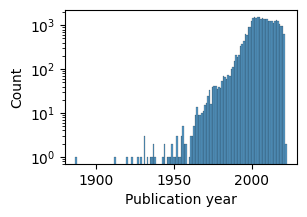

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 2))
sns.histplot(df, x='year', stat='count', discrete=True)
plt.xlabel('Publication year')
plt.yscale('log')
plt.ylabel('Count')
plt.show()

## 10-fold cv

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

# 指标: Accuracy, Precision, Recall, F1
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score)
}

# text_features = ['abstract', 'annotation', 'deepseek_v3', 'gemma3', 'llama4', 'qwq']
text_features = models + ['annotation', 'abstract']
y = (df['year'] >= 2008).astype(int)

cv = KFold(n_splits=10, shuffle=True, random_state=42)

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    X_text = df[feat].astype(str).fillna('')
    vectorizer = ProgressHashingVectorizer(n_features=2**20, stop_words='english', alternate_sign=False)
    X = vectorizer.transform(X_text)
    model = MultinomialNB()
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1, verbose=1, return_train_score=False)
    res = {
        'feature': feat,
        'Accuracy_mean': scores['test_Accuracy'].mean(),
        'Accuracy_std': scores['test_Accuracy'].std(),
        'Precision_mean': scores['test_Precision'].mean(),
        'Precision_std': scores['test_Precision'].std(),
        'Recall_mean': scores['test_Recall'].mean(),
        'Recall_std': scores['test_Recall'].std(),
        'F1_mean': scores['test_F1'].mean(),
        'F1_std': scores['test_F1'].std(),
    }
    print(
        f"Feature: {feat} | "
        f"Accuracy: {res['Accuracy_mean']:.4f}±{res['Accuracy_std']:.4f} | "
        f"F1: {res['F1_mean']:.4f}±{res['F1_std']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
display(results_df)

Processing feature: gemma3


Vectorizing documents:   0%|                                                                                                            | 0/34146 [00:00<?, ?it/s]

Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 34146/34146 [00:00<00:00, 89301.78it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
/home/zqlyu2/.local/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    4.0s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.0s finished


Feature: gemma3 | Accuracy: 0.7049±0.0074 | F1: 0.6446±0.0089
Processing feature: llama4


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 34146/34146 [00:00<00:00, 76306.55it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
/home/zqlyu2/.local/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.0s finished


Feature: llama4 | Accuracy: 0.7020±0.0086 | F1: 0.6547±0.0101
Processing feature: annotation


Vectorizing documents: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 34146/34146 [00:00<00:00, 111202.33it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


Feature: annotation | Accuracy: 0.7161±0.0090 | F1: 0.6678±0.0120
Processing feature: abstract


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 34146/34146 [00:02<00:00, 16993.84it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


Feature: abstract | Accuracy: 0.7542±0.0080 | F1: 0.7063±0.0094


,feature,Accuracy_mean,Accuracy_std,Precision_mean,Precision_std,Recall_mean,Recall_std,F1_mean,F1_std
0,gemma3,0.704856,0.007369,0.771654,0.011675,0.553764,0.014894,0.644592,0.008896
1,llama4,0.701956,0.008589,0.744273,0.012986,0.584601,0.013100,0.654728,0.010091
2,annotation,0.716131,0.009039,0.768938,0.013663,0.590483,0.016425,0.667834,0.011960
3,abstract,0.754203,0.008020,0.836492,0.011048,0.611367,0.014414,0.706276,0.009402


## no cv

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

text_features = ['abstract', 'annotation', 'deepseek_v3', 'gemma3', 'llama4', 'qwq']
y = df['year'].astype(int)  # 年份作为连续变量回归

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    X_text = df[feat].astype(str).fillna('')
    X_train, X_test, y_train, y_test = train_test_split(
        X_text, y, test_size=0.1, random_state=42
    )

    vectorizer = ProgressHashingVectorizer(n_features=2**18, stop_words='english', alternate_sign=False)
    X_train_vec = vectorizer.transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    model = Ridge(alpha=1.0)
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    res = {
        'feature': feat,
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred),
    }
    print(
        f"Feature: {feat} | "
        f"MAE: {res['MAE']:.4f} | "
        f"R2: {res['R2']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
results_df

Processing feature: abstract


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 22020.20it/s]


Feature: abstract | MAE: 4.2865 | R2: 0.5755
Processing feature: annotation


Vectorizing documents: 100%|████████████████████████████████████████████| 3415/3415 [00:00<00:00, 130228.28it/s]


Feature: annotation | MAE: 5.5461 | R2: 0.3061
Processing feature: deepseek_v3


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 77554.96it/s]


Feature: deepseek_v3 | MAE: 5.0521 | R2: 0.4281
Processing feature: gemma3


Vectorizing documents: 100%|████████████████████████████████████████████| 3415/3415 [00:00<00:00, 120217.45it/s]


Feature: gemma3 | MAE: 5.5035 | R2: 0.3244
Processing feature: llama4


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 54197.36it/s]


Feature: llama4 | MAE: 5.5231 | R2: 0.3139
Processing feature: qwq


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 44297.08it/s]


Feature: qwq | MAE: 5.0755 | R2: 0.4131


,feature,MAE,MSE,R2
0,abstract,4.286524,34.042876,0.575475
1,annotation,5.546063,55.646234,0.306074
2,deepseek_v3,5.052078,45.857851,0.428139
3,gemma3,5.503463,54.177417,0.324391
4,llama4,5.523119,55.020432,0.313878
5,qwq,5.075490,47.060866,0.413137


# Predict title

## Fetch titles

In [10]:
import pandas as pd
from sqlalchemy import create_engine
from tqdm import tqdm

MYSQL_HOST = '144.214.39.113'
MYSQL_USER = 'key'
MYSQL_PASS = 'Keydge11'
MYSQL_DB = 'keydge'

engine = create_engine(f'mysql+pymysql://{MYSQL_USER}:{MYSQL_PASS}@{MYSQL_HOST}/{MYSQL_DB}?charset=utf8mb4')

paper_ids = df['paper_id'].unique().tolist()
BATCH_SIZE = 500  # 每批查多少条，可调大或调小

results = []
# 用tqdm显示批次进度和预计完成时间
for i in tqdm(range(0, len(paper_ids), BATCH_SIZE), desc="Querying titles", unit="batch"):
    batch = paper_ids[i:i+BATCH_SIZE]
    id_str = ','.join(str(int(pid)) for pid in batch)
    sql = f"SELECT paper_id, title FROM paper_bib WHERE paper_id IN ({id_str})"
    batch_df = pd.read_sql(sql, engine)
    results.append(batch_df)

# 合并所有批次的查询结果
paper_title_df = pd.concat(results, ignore_index=True)
display(paper_title_df)

Querying titles: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 57/57 [00:00<00:00, 160.05batch/s]


,paper_id,title
0,1353153,Efficient Generation of a Hepatitis B Virus Cy...
1,1634910,"Structure of Hjc, a Holliday junction resolvas..."
2,1655469,From Complete Genomes to Measures of Substitut...
3,1778349,Regulation of the Proinflammatory Effects of F...
4,2550721,Differential requirement for p19ARF in the p53...
...,...,...
28005,83433077,Revisiting IL-2: Biology and therapeutic prosp...
28006,104021261,Systems-level analysis of mechanisms regulatin...
28007,104393236,siRNA nanoparticles targeting CaMKIIγ in lesio...
28008,123181209,Immunotherapy of autoimmune encephalomyelitis ...


In [ ]:
paper_title_df.to_parquet(home / 'projects/TLDR/data/paper_title.parquet', index=False)

## Load titles

In [11]:
paper_title_df = pd.read_parquet(home / 'projects/TLDR/data/paper_title.parquet')
df = df.merge(paper_title_df, on='paper_id', how='left')
display(df)

,doi,paper_id,abstract,annotation,gemma3,llama4,mag_pid,mag_vid,year,p2v_label,scopus_label,title
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This reference reports on phylogenetic relatio...,These results provide evidence that modern cat...,2005395185,125754415,1994,17,Multidisciplinary,Evidence for two independent domestications of...
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study demonstrates that European domestic...,These findings provide evidence for independen...,2110049233,65932378,2000,17,"Biochemistry, Genetics and Molecular Biology",The Origin of the Domestic Pig: Independent Do...
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This reference details a fine-mapping strategy...,The authors fine-map a QTL for milk fat percen...,2082900742,125754415,1999,17,Multidisciplinary,Fine-mapping of quantitative trait loci by ide...
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This paper reports high levels of linkage dise...,This study is among the first to examine the e...,2103106090,43092948,2000,17,"Biochemistry, Genetics and Molecular Biology",Extensive Genome-wide Linkage Disequilibrium i...
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This work describes a QTL mapping study of a w...,This study mapped genetic loci associated with...,2045457895,3880285,1994,8,Multidisciplinary,Genetic mapping of quantitative trait loci for...
...,...,...,...,...,...,...,...,...,...,...,...,...
34141,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This work shows that Tregs from type 1 diabeti...,This study highlights the challenges of transl...,2137227986,129060628,2009,17,Medicine,Expansion of Human Regulatory T-Cells From Pat...
34142,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study demonstrates that engineered IL-2 r...,These findings suggest that engineering cytoki...,2789780246,3880285,2018,8,Multidisciplinary,Selective targeting of engineered T cells usin...
34143,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identified that autoreactive T cell...,T cells recognize a unique type of antigen tha...,2266478788,3880285,2016,8,Multidisciplinary,Pathogenic CD4 T cells in type 1 diabetes reco...
34144,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This report describes a novel genome editing a...,This study demonstrated that human ESCs and iP...,2943378944,125754415,2019,17,Multidisciplinary,Generation of hypoimmunogenic human pluripoten...


## Generate negative samples

### Use random title of other papers in same subject

In [12]:
import pandas as pd
import numpy as np
from tqdm import tqdm

pos_df = df.copy()

# 标记正样本
pos_df['title_paired'] = True

# 收集负样本
neg_samples = []
rng = np.random.default_rng(42)  # 固定随机种子便于复现

for idx, row in tqdm(pos_df.iterrows(), total=len(pos_df), desc="生成负样本"):
    # 查找同学科标签但不同paper_id的候选title
    candidates = pos_df[(pos_df['p2v_label'] == row['p2v_label']) & (pos_df['paper_id'] != row['paper_id'])]
    if not candidates.empty:
        neg_title = rng.choice(candidates['title'].values)
        neg_row = row.copy()
        neg_row['title'] = neg_title
        neg_row['title_paired'] = False
        neg_samples.append(neg_row)
    else:
        raise ValueError(f"没有找到与行 {idx} 同学科但不同paper_id的候选title。")

neg_df = pd.DataFrame(neg_samples)

# 合并正负样本
title_match_df = pd.concat([pos_df, neg_df], ignore_index=True)

生成负样本:   0%|                                                                                                             | 39/34146 [00:00<01:27, 389.07it/s]

生成负样本: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 34146/34146 [00:49<00:00, 686.76it/s]


In [13]:
title_match_df[title_match_df['title_paired'] == False]['title'].sample(5).tolist()

['Responding to the Impacts of the Climate Crisis on Children and Youth',
 'Transgenic Anopheles stephensi coexpressing single-chain antibodies resist Plasmodium falciparum development',
 'AG-221, a First-in-Class Therapy Targeting Acute Myeloid Leukemia Harboring Oncogenic IDH2 Mutations',
 'Toxin, toxin-coregulated pili, and the toxR regulon are essential for Vibrio cholerae pathogenesis in humans.',
 'Defining the origins of Ras/p53-mediated squamous cell carcinoma']

## Evaluation

In [14]:
title_match_df

,doi,paper_id,abstract,annotation,gemma3,llama4,mag_pid,mag_vid,year,p2v_label,scopus_label,title,title_paired
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This reference reports on phylogenetic relatio...,These results provide evidence that modern cat...,2005395185,125754415,1994,17,Multidisciplinary,Evidence for two independent domestications of...,True
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study demonstrates that European domestic...,These findings provide evidence for independen...,2110049233,65932378,2000,17,"Biochemistry, Genetics and Molecular Biology",The Origin of the Domestic Pig: Independent Do...,True
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This reference details a fine-mapping strategy...,The authors fine-map a QTL for milk fat percen...,2082900742,125754415,1999,17,Multidisciplinary,Fine-mapping of quantitative trait loci by ide...,True
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This paper reports high levels of linkage dise...,This study is among the first to examine the e...,2103106090,43092948,2000,17,"Biochemistry, Genetics and Molecular Biology",Extensive Genome-wide Linkage Disequilibrium i...,True
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This work describes a QTL mapping study of a w...,This study mapped genetic loci associated with...,2045457895,3880285,1994,8,Multidisciplinary,Genetic mapping of quantitative trait loci for...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68287,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This work shows that Tregs from type 1 diabeti...,This study highlights the challenges of transl...,2137227986,129060628,2009,17,Medicine,Experience and Activity-Dependent Maturation o...,False
68288,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study demonstrates that engineered IL-2 r...,These findings suggest that engineering cytoki...,2789780246,3880285,2018,8,Multidisciplinary,A Clonogenic Bone Marrow Progenitor Specific f...,False
68289,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identified that autoreactive T cell...,T cells recognize a unique type of antigen tha...,2266478788,3880285,2016,8,Multidisciplinary,Single-cell RNA-seq highlights intratumoral he...,False
68290,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This report describes a novel genome editing a...,This study demonstrated that human ESCs and iP...,2943378944,125754415,2019,17,Multidisciplinary,Iterative fractionation of recycling receptors...,False


### 10-CV

#### LogisticRegression

In [49]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

# 评价指标
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score)
}

text_features = ['abstract', 'annotation', 'deepseek_v3', 'qwen3','gemma3', 'llama4', 'qwq']
y = title_match_df['title_paired'].astype(int)  # 1: 匹配，0: 不匹配

cv = KFold(n_splits=10, shuffle=True, random_state=42)

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    # 拼接title和对应的feature
    X_text = (title_match_df['title'].astype(str).fillna('') + ' [SEP] ' + title_match_df[feat].astype(str).fillna(''))
    vectorizer = ProgressHashingVectorizer(n_features=2**20, stop_words='english', alternate_sign=False)
    X = vectorizer.transform(X_text)
    model = LogisticRegression(max_iter=2000, random_state=42)
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1, verbose=1, return_train_score=False)
    res = {
        'feature': feat,
        'Accuracy_mean': scores['test_Accuracy'].mean(),
        'Accuracy_std': scores['test_Accuracy'].std(),
        'Precision_mean': scores['test_Precision'].mean(),
        'Precision_std': scores['test_Precision'].std(),
        'Recall_mean': scores['test_Recall'].mean(),
        'Recall_std': scores['test_Recall'].std(),
        'F1_mean': scores['test_F1'].mean(),
        'F1_std': scores['test_F1'].std(),
    }
    print(
        f"Feature: {feat} | "
        f"Accuracy: {res['Accuracy_mean']:.4f}±{res['Accuracy_std']:.4f} | "
        f"F1: {res['F1_mean']:.4f}±{res['F1_std']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
display(results_df)

Processing feature: abstract


Vectorizing documents:   0%|                                                                                                            | 0/68292 [00:00<?, ?it/s]

Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 68292/68292 [00:04<00:00, 15976.39it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    5.3s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.8s finished


Feature: abstract | Accuracy: 0.5499±0.0056 | F1: 0.5498±0.0070
Processing feature: annotation


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 68292/68292 [00:00<00:00, 72535.34it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    4.2s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.1s finished


Feature: annotation | Accuracy: 0.6618±0.0051 | F1: 0.6569±0.0062
Processing feature: deepseek_v3


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 68292/68292 [00:01<00:00, 46628.61it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.5s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.1s finished


Feature: deepseek_v3 | Accuracy: 0.7557±0.0062 | F1: 0.7537±0.0069
Processing feature: qwen3


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 68292/68292 [00:02<00:00, 32650.61it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    4.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.4s finished


Feature: qwen3 | Accuracy: 0.7139±0.0055 | F1: 0.7124±0.0040
Processing feature: gemma3


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 68292/68292 [00:01<00:00, 64844.09it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.3s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.9s finished


Feature: gemma3 | Accuracy: 0.7577±0.0038 | F1: 0.7544±0.0045
Processing feature: llama4


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 68292/68292 [00:01<00:00, 38042.45it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    4.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.0s finished


Feature: llama4 | Accuracy: 0.6843±0.0058 | F1: 0.6779±0.0066
Processing feature: qwq


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 68292/68292 [00:02<00:00, 30616.49it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.4s remaining:    3.4s


Feature: qwq | Accuracy: 0.6742±0.0061 | F1: 0.6738±0.0057


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.9s finished


,feature,Accuracy_mean,Accuracy_std,Precision_mean,Precision_std,Recall_mean,Recall_std,F1_mean,F1_std
0,abstract,0.549933,0.005592,0.549973,0.007610,0.549904,0.011833,0.549849,0.006991
1,annotation,0.661805,0.005107,0.666455,0.007536,0.647740,0.006525,0.656947,0.006182
2,deepseek_v3,0.755682,0.006233,0.759852,0.007990,0.747601,0.007543,0.753659,0.006902
3,qwen3,0.713920,0.005532,0.716325,0.007133,0.708609,0.008824,0.712379,0.004045
4,gemma3,0.757658,0.003785,0.764547,0.006018,0.744599,0.005684,0.754423,0.004546
5,llama4,0.684282,0.005826,0.691811,0.009807,0.664674,0.006120,0.677939,0.006620
6,qwq,0.674222,0.006091,0.674641,0.006608,0.673095,0.008468,0.673829,0.005692


#### BERT

In [15]:
import pandas as pd
import numpy as np
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
import torch
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os
import glob

# 设定设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 评价指标
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    return {
        'accuracy': accuracy_score(labels, preds),
        'precision': precision_score(labels, preds),
        'recall': recall_score(labels, preds),
        'f1': f1_score(labels, preds)
    }

class TitlePairDataset(torch.utils.data.Dataset):
    def __init__(self, titles, contents, labels, tokenizer, max_length=128):
        self.encodings = tokenizer(
            titles, contents,
            padding='max_length',
            truncation=True,
            max_length=max_length,
            return_tensors='pt'
        )
        self.labels = torch.tensor(labels, dtype=torch.long)
    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item
    def __len__(self):
        return len(self.labels)

def get_best_checkpoint_dir(output_dir):
    # 查找所有保存的checkpoint目录
    checkpoint_dirs = glob.glob(os.path.join(output_dir, "checkpoint-*"))
    if not checkpoint_dirs:
        return None
    # 选最大编号的checkpoint（也可以自定义选择策略）
    best_ckpt = max(checkpoint_dirs, key=lambda x: int(x.split('-')[-1]))
    # 检查里面是否有权重文件
    model_files = ["model.safetensors", "pytorch_model.bin"]
    for mf in model_files:
        if os.path.exists(os.path.join(best_ckpt, mf)):
            return best_ckpt
    return None

# 配置
text_features = models + ['annotation', 'abstract']
y = title_match_df['title_paired'].astype(int).values
cv = KFold(n_splits=10, shuffle=True, random_state=42)
results = []

model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizerFast.from_pretrained(model_name)

for feat in text_features:
    print(f"\nProcessing feature: {feat}")
    X_title = title_match_df['title'].astype(str).fillna('').tolist()
    X_content = title_match_df[feat].astype(str).fillna('').tolist()
    labels = y

    fold_metrics = []
    for fold, (train_idx, test_idx) in enumerate(cv.split(X_title)):
        print(f"  Fold {fold+1}/10")

        train_titles = [X_title[i] for i in train_idx]
        train_contents = [X_content[i] for i in train_idx]
        train_labels = labels[train_idx]

        test_titles = [X_title[i] for i in test_idx]
        test_contents = [X_content[i] for i in test_idx]
        test_labels = labels[test_idx]

        train_dataset = TitlePairDataset(train_titles, train_contents, train_labels, tokenizer)
        test_dataset = TitlePairDataset(test_titles, test_contents, test_labels, tokenizer)

        output_dir = home / f'projects/TLDR/evaluation/predict_task/sent_shuffle/cached_title_distilbert_{feat}' / f'fold_{fold}'
        output_dir_str = str(output_dir)
        best_ckpt = get_best_checkpoint_dir(output_dir_str)
        if best_ckpt is not None:
            print(f"    Cached model detected for {feat} fold {fold} at {best_ckpt}, loading and evaluating...")
            model = DistilBertForSequenceClassification.from_pretrained(best_ckpt, num_labels=2).to(device)
            trainer = Trainer(
                model=model,
                args=TrainingArguments(
                    output_dir=output_dir_str,
                    per_device_eval_batch_size=32,
                    report_to=[],
                    seed=42+fold
                ),
                eval_dataset=test_dataset,
                compute_metrics=compute_metrics,
            )
            eval_result = trainer.evaluate()
            fold_metrics.append(eval_result)
            del model
            torch.cuda.empty_cache()
            continue

        print(f"    No cached model found for {feat} fold {fold}, training...")
        model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=2).to(device)

        training_args = TrainingArguments(
            output_dir=output_dir,
            num_train_epochs=1,
            per_device_train_batch_size=16,
            per_device_eval_batch_size=32,
            eval_strategy='steps',
            eval_steps=200,
            save_strategy='steps',
            save_steps=200,
            save_total_limit=1,
            learning_rate=2e-5,
            logging_steps=50,
            report_to=[],
            load_best_model_at_end=True,
            metric_for_best_model='eval_loss',
            greater_is_better=False,
            seed=42
        )

        trainer = Trainer(
            model=model,
            args=training_args,
            train_dataset=train_dataset,
            eval_dataset=test_dataset,
            compute_metrics=compute_metrics,
        )

        trainer.train()
        eval_result = trainer.evaluate()
        fold_metrics.append(eval_result)

        del model
        torch.cuda.empty_cache()

    res = {
        'feature': feat,
        'Accuracy_mean': np.mean([m['eval_accuracy'] for m in fold_metrics]),
        'Accuracy_std': np.std([m['eval_accuracy'] for m in fold_metrics]),
        'Precision_mean': np.mean([m['eval_precision'] for m in fold_metrics]),
        'Precision_std': np.std([m['eval_precision'] for m in fold_metrics]),
        'Recall_mean': np.mean([m['eval_recall'] for m in fold_metrics]),
        'Recall_std': np.std([m['eval_recall'] for m in fold_metrics]),
        'F1_mean': np.mean([m['eval_f1'] for m in fold_metrics]),
        'F1_std': np.std([m['eval_f1'] for m in fold_metrics]),
    }
    print(
        f"Feature: {feat} | "
        f"Accuracy: {res['Accuracy_mean']:.4f}±{res['Accuracy_std']:.4f} | "
        f"F1: {res['F1_mean']:.4f}±{res['F1_std']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
display(results_df)

/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(



Processing feature: gemma3
  Fold 1/10
    No cached model found for gemma3 fold 0, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.125800,0.103381,0.966179,0.968136,0.963259,0.965691
400,0.095300,0.081765,0.974231,0.981922,0.965630,0.973708
600,0.092600,0.070657,0.977160,0.973243,0.980741,0.976978
800,0.084600,0.064772,0.978624,0.981509,0.975111,0.978300


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 2/10
    No cached model found for gemma3 fold 1, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.134200,0.098653,0.969253,0.975053,0.962326,0.968647
400,0.095700,0.085892,0.971889,0.984161,0.958469,0.971145
600,0.090300,0.089343,0.973939,0.978998,0.967962,0.973449
800,0.070900,0.076971,0.975695,0.978501,0.972115,0.975298


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 3/10
    No cached model found for gemma3 fold 2, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.145300,0.129515,0.956802,0.941061,0.975276,0.957863
400,0.089400,0.092783,0.973495,0.979676,0.967423,0.973511
600,0.083700,0.080985,0.974374,0.988619,0.960151,0.974177
800,0.083800,0.071235,0.978474,0.983260,0.973822,0.978518


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 4/10
    No cached model found for gemma3 fold 3, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.107400,0.106406,0.966906,0.975893,0.957652,0.966686
400,0.108000,0.083316,0.971885,0.980952,0.962617,0.971698
600,0.090600,0.076800,0.973203,0.971761,0.974883,0.973320
800,0.096200,0.071722,0.975399,0.975467,0.975467,0.975467


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 5/10
    No cached model found for gemma3 fold 4, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.111300,0.103167,0.967784,0.979780,0.955904,0.967695
400,0.116000,0.091170,0.970860,0.981043,0.960836,0.970834
600,0.089000,0.085089,0.972031,0.979388,0.964897,0.972088
800,0.087500,0.080177,0.972763,0.975226,0.970699,0.972957


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 6/10
    No cached model found for gemma3 fold 5, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.125500,0.115611,0.961927,0.948529,0.974320,0.961252
400,0.095700,0.084599,0.973349,0.979167,0.965559,0.972315
600,0.083200,0.086963,0.970420,0.979038,0.959517,0.969179
800,0.071300,0.082031,0.973642,0.983025,0.962236,0.972519


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 7/10
    No cached model found for gemma3 fold 6, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.123500,0.087841,0.971299,0.981888,0.960779,0.971219
400,0.104700,0.069567,0.977010,0.981248,0.972981,0.977097
600,0.090600,0.061465,0.979646,0.984453,0.975015,0.979711
800,0.073700,0.058098,0.980817,0.982231,0.979663,0.980945


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 8/10
    No cached model found for gemma3 fold 7, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.136800,0.109304,0.963684,0.969472,0.957553,0.963476
400,0.099800,0.092347,0.971152,0.974359,0.967799,0.971068
600,0.100200,0.073272,0.973935,0.977300,0.970433,0.973854
800,0.082600,0.077428,0.974813,0.975939,0.973653,0.974795


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 9/10
    No cached model found for gemma3 fold 8, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.118700,0.111444,0.962513,0.983651,0.941466,0.962097
400,0.098100,0.088992,0.969835,0.974832,0.965227,0.970006
600,0.090900,0.082762,0.972177,0.978293,0.966387,0.972303
800,0.082400,0.079324,0.973056,0.980300,0.966097,0.973147


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 10/10
    No cached model found for gemma3 fold 9, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.137200,0.099042,0.967052,0.962141,0.973502,0.967788
400,0.084500,0.082215,0.973203,0.987548,0.959389,0.973265
600,0.093400,0.074314,0.976278,0.986479,0.966590,0.976433
800,0.088100,0.067655,0.978474,0.985685,0.971774,0.978680


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

Feature: gemma3 | Accuracy: 0.9761±0.0027 | F1: 0.9760±0.0028

Processing feature: llama4
  Fold 1/10
    No cached model found for llama4 fold 0, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.183200,0.183827,0.932504,0.913451,0.953778,0.933179
400,0.150500,0.156731,0.943924,0.985399,0.899852,0.940685
600,0.145500,0.123611,0.957833,0.957333,0.957333,0.957333
800,0.126700,0.113383,0.962958,0.975046,0.949333,0.962018


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 2/10
    No cached model found for llama4 fold 1, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.211000,0.174057,0.937628,0.958009,0.913675,0.935317
400,0.169700,0.125943,0.954466,0.970191,0.936517,0.953057
600,0.142900,0.115855,0.959297,0.963440,0.953723,0.958557
800,0.130300,0.115767,0.959736,0.964865,0.953130,0.958961


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 3/10
    No cached model found for llama4 fold 2, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.202700,0.180197,0.934690,0.941819,0.927574,0.934642
400,0.149900,0.148025,0.947284,0.944541,0.951134,0.947826
600,0.125500,0.129982,0.955191,0.969988,0.940081,0.954801
800,0.125700,0.127838,0.956509,0.977501,0.935137,0.955850


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 4/10
    No cached model found for llama4 fold 3, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.182800,0.179855,0.932933,0.967234,0.896612,0.930585
400,0.154000,0.149200,0.948309,0.943914,0.953563,0.948714
600,0.136400,0.156917,0.945966,0.982013,0.908879,0.944032
800,0.144900,0.126695,0.954166,0.965301,0.942465,0.953746


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 5/10
    No cached model found for llama4 fold 4, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.188000,0.178019,0.935862,0.923445,0.951842,0.937429
400,0.156000,0.138071,0.950505,0.968646,0.932115,0.950030
600,0.144500,0.136102,0.952555,0.976212,0.928634,0.951829
800,0.146600,0.125708,0.957388,0.973589,0.941108,0.957073


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 6/10
    No cached model found for llama4 fold 5, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.176100,0.164689,0.939669,0.971987,0.901511,0.935423
400,0.156600,0.127986,0.955338,0.966181,0.940785,0.953314
600,0.125800,0.128757,0.956216,0.948199,0.962236,0.955166
800,0.143000,0.113413,0.959291,0.956077,0.960121,0.958095


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 7/10
    No cached model found for llama4 fold 6, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.191200,0.151786,0.945819,0.940115,0.953225,0.946624
400,0.158000,0.125562,0.959438,0.967228,0.951772,0.959438
600,0.135900,0.120363,0.957680,0.945465,0.972109,0.958602
800,0.113900,0.103387,0.967199,0.976882,0.957583,0.967136


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 8/10
    No cached model found for llama4 fold 7, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.205100,0.171680,0.940548,0.941349,0.939696,0.940522
400,0.155100,0.161918,0.944794,0.930088,0.961944,0.945748
600,0.151900,0.120652,0.959584,0.969498,0.949063,0.959172
800,0.114400,0.115851,0.961634,0.973289,0.949356,0.961174


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 9/10
    No cached model found for llama4 fold 8, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.169200,0.161108,0.943916,0.956548,0.931324,0.943767
400,0.162000,0.141040,0.950798,0.972399,0.929006,0.950207
600,0.138100,0.126784,0.954312,0.959590,0.949580,0.954559
800,0.122200,0.124174,0.955777,0.968462,0.943205,0.955666


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 10/10
    No cached model found for llama4 fold 9, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.205400,0.176186,0.937033,0.926050,0.952189,0.938938
400,0.145700,0.129936,0.955191,0.967790,0.943260,0.955368
600,0.140600,0.121814,0.958120,0.961204,0.956221,0.958706
800,0.123400,0.114838,0.961634,0.973172,0.950749,0.961830


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

Feature: llama4 | Accuracy: 0.9596±0.0037 | F1: 0.9592±0.0038

Processing feature: annotation
  Fold 1/10
    No cached model found for annotation fold 0, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.253500,0.249539,0.909663,0.885411,0.938667,0.911261
400,0.218500,0.188467,0.934407,0.942814,0.923259,0.932934
600,0.185000,0.180557,0.930893,0.920847,0.941037,0.930832
800,0.187800,0.158873,0.940703,0.958616,0.919704,0.938757


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 2/10
    No cached model found for annotation fold 1, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.254800,0.231830,0.913470,0.914184,0.910116,0.912145
400,0.214000,0.219524,0.921083,0.963654,0.873035,0.916109
600,0.191400,0.191747,0.930454,0.925382,0.934441,0.929889
800,0.169500,0.179606,0.935578,0.950507,0.917235,0.933575


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 3/10
    No cached model found for annotation fold 2, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.281200,0.236020,0.910821,0.932701,0.886853,0.909199
400,0.222200,0.196895,0.925611,0.930123,0.921466,0.925774
600,0.197400,0.173719,0.934983,0.942637,0.927283,0.934897
800,0.186100,0.163054,0.938937,0.949153,0.928447,0.938685


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 4/10
    No cached model found for annotation fold 3, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.262800,0.225440,0.916532,0.957079,0.872664,0.912924
400,0.216800,0.184106,0.930444,0.922614,0.940129,0.931289
600,0.176000,0.160975,0.940401,0.953684,0.926110,0.939695
800,0.193100,0.155825,0.943330,0.948067,0.938376,0.943197


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 5/10
    No cached model found for annotation fold 4, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.228900,0.221784,0.917850,0.923664,0.912678,0.918138
400,0.221100,0.190014,0.930883,0.962100,0.898462,0.929193
600,0.200700,0.172308,0.936740,0.958625,0.914128,0.935848
800,0.186500,0.174760,0.936301,0.973287,0.898462,0.934379


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 6/10
    No cached model found for annotation fold 5, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.276400,0.248560,0.902328,0.909767,0.886405,0.897934
400,0.222800,0.197424,0.926636,0.938769,0.907855,0.923053
600,0.200500,0.180065,0.931322,0.938020,0.919033,0.928430
800,0.180100,0.171060,0.933958,0.947979,0.913897,0.930626


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 7/10
    No cached model found for annotation fold 6, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.271300,0.228288,0.914482,0.938344,0.888727,0.912862
400,0.215500,0.197104,0.927954,0.933824,0.922429,0.928091
600,0.182200,0.175032,0.935276,0.951264,0.918652,0.934673
800,0.177000,0.166469,0.939083,0.966687,0.910517,0.937762


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 8/10
    No cached model found for annotation fold 7, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.234900,0.238214,0.909943,0.934803,0.881440,0.907338
400,0.217000,0.196319,0.928979,0.956969,0.898419,0.926770
600,0.192500,0.175843,0.933519,0.942883,0.923009,0.932840
800,0.188400,0.167554,0.937326,0.962825,0.909836,0.935581


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 9/10
    No cached model found for annotation fold 8, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.251000,0.222328,0.916093,0.940600,0.890177,0.914694
400,0.216800,0.181193,0.935569,0.939306,0.932773,0.936028
600,0.173500,0.170431,0.939962,0.966268,0.913069,0.938915
800,0.167200,0.158092,0.942744,0.961399,0.923790,0.942220


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 10/10
    No cached model found for annotation fold 9, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.261000,0.224705,0.916386,0.932082,0.901210,0.916386
400,0.195900,0.193702,0.930444,0.952309,0.908698,0.929993
600,0.192400,0.173701,0.937912,0.950888,0.925691,0.938120
800,0.194000,0.169993,0.937180,0.966575,0.907834,0.936284


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

Feature: annotation | Accuracy: 0.9386±0.0029 | F1: 0.9373±0.0036

Processing feature: abstract
  Fold 1/10
    No cached model found for abstract fold 0, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.131200,0.144475,0.950220,0.920943,0.983704,0.951289
400,0.099800,0.065431,0.979209,0.980958,0.976889,0.978919
600,0.076300,0.062204,0.981698,0.979351,0.983704,0.981523
800,0.064700,0.055013,0.983163,0.983967,0.981926,0.982945


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 2/10
    No cached model found for abstract fold 1, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.122600,0.114086,0.959590,0.973097,0.944230,0.958446
400,0.088400,0.076906,0.974817,0.970580,0.978641,0.974594
600,0.059400,0.063834,0.979941,0.974194,0.985464,0.979796
800,0.045800,0.062969,0.981991,0.982185,0.981311,0.981748


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 3/10
    No cached model found for abstract fold 2, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.124800,0.109970,0.962220,0.978916,0.945317,0.961823
400,0.101400,0.074526,0.973203,0.965665,0.981675,0.973605
600,0.077600,0.047771,0.985503,0.986593,0.984584,0.985587
800,0.074800,0.043904,0.985357,0.989730,0.981094,0.985393


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 4/10
    No cached model found for abstract fold 3, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.136000,0.100765,0.963538,0.962424,0.964953,0.963687
400,0.088900,0.073258,0.974228,0.979905,0.968458,0.974148
600,0.077700,0.061766,0.978913,0.986358,0.971379,0.978811
800,0.065400,0.052882,0.982721,0.981924,0.983645,0.982784


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 5/10
    No cached model found for abstract fold 4, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.126700,0.111551,0.964124,0.951749,0.978532,0.964955
400,0.084000,0.089762,0.970860,0.964000,0.978822,0.971355
600,0.087500,0.064326,0.979499,0.975827,0.983754,0.979775
800,0.061200,0.059677,0.983453,0.980681,0.986655,0.983659


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 6/10
    No cached model found for abstract fold 5, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.128500,0.102068,0.962659,0.973057,0.949245,0.961003
400,0.083500,0.069789,0.977010,0.978452,0.974018,0.976230
600,0.071400,0.059580,0.980085,0.977724,0.981269,0.979493
800,0.060700,0.053397,0.982281,0.982743,0.980665,0.981703


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 7/10
    No cached model found for abstract fold 6, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.123600,0.097671,0.965441,0.965447,0.966008,0.965728
400,0.097100,0.068281,0.977742,0.970807,0.985474,0.978085
600,0.074100,0.050088,0.984332,0.986293,0.982568,0.984427
800,0.067200,0.048498,0.986235,0.986345,0.986345,0.986345


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 8/10
    No cached model found for abstract fold 7, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.128500,0.124458,0.954459,0.933054,0.979215,0.955578
400,0.088400,0.073692,0.975253,0.983041,0.967213,0.975063
600,0.074500,0.060822,0.980964,0.982384,0.979508,0.980944
800,0.065200,0.061258,0.981110,0.988991,0.973068,0.980965


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 9/10
    No cached model found for abstract fold 8, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.133500,0.114516,0.957827,0.962833,0.953347,0.958066
400,0.083800,0.080973,0.971445,0.968354,0.975369,0.971849
600,0.066500,0.085760,0.973788,0.958520,0.991017,0.974498
800,0.065900,0.057193,0.982428,0.979557,0.985801,0.982669


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 10/10
    No cached model found for abstract fold 9, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.131800,0.117534,0.959291,0.948092,0.973214,0.960489
400,0.084800,0.083727,0.972324,0.971560,0.974078,0.972817
600,0.074000,0.074588,0.976278,0.965672,0.988479,0.976943
800,0.066900,0.054834,0.982281,0.983271,0.981855,0.982562


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

Feature: abstract | Accuracy: 0.9831±0.0015 | F1: 0.9831±0.0016


,feature,Accuracy_mean,Accuracy_std,Precision_mean,Precision_std,Recall_mean,Recall_std,F1_mean,F1_std
0,gemma3,0.976088,0.002677,0.980250,0.003342,0.971742,0.004663,0.975969,0.002796
1,llama4,0.959629,0.003688,0.970418,0.006370,0.948219,0.007364,0.959155,0.003755
2,annotation,0.938558,0.002865,0.957043,0.007134,0.918376,0.009043,0.937253,0.003574
3,abstract,0.983087,0.001509,0.983279,0.002761,0.982880,0.002434,0.983075,0.001585


### No CV

In [42]:
import pandas as pd
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# 设定设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 评价指标
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    return {
        'accuracy': accuracy_score(labels, preds),
        'precision': precision_score(labels, preds),
        'recall': recall_score(labels, preds),
        'f1': f1_score(labels, preds)
    }

class TitlePairDataset(torch.utils.data.Dataset):
    def __init__(self, titles, contents, labels, tokenizer, max_length=128):
        self.encodings = tokenizer(
            titles, contents,
            padding='max_length',
            truncation=True,
            max_length=max_length,
            return_tensors='pt'
        )
        self.labels = torch.tensor(labels, dtype=torch.long)
    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item
    def __len__(self):
        return len(self.labels)

text_features = models + ['annotation', 'abstract']
y = title_match_df['title_paired'].astype(int).values
results = []

model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizerFast.from_pretrained(model_name)

for feat in text_features:
    print(f"\nProcessing feature: {feat}")
    output_dir = home / f'projects/TLDR/evaluation/predict_task/cached_title_distilbert_{feat}' / 'no_cv'
    output_dir_str = str(output_dir)
    X_title = title_match_df['title'].astype(str).fillna('').tolist()
    X_content = title_match_df[feat].astype(str).fillna('').tolist()
    labels = y

    # dataset split
    train_titles, test_titles, train_contents, test_contents, train_labels, test_labels = train_test_split(
        X_title, X_content, labels, test_size=0.2, random_state=42, stratify=labels
    )

    # construct datasets
    train_dataset = TitlePairDataset(train_titles, train_contents, train_labels, tokenizer)
    test_dataset = TitlePairDataset(test_titles, test_contents, test_labels, tokenizer)

    # 新建模型
    model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=2).to(device)

    training_args = TrainingArguments(
        output_dir=output_dir_str,
        num_train_epochs=1,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=32,
        eval_strategy='steps',
        eval_steps=200,
        save_strategy='no',
        learning_rate=2e-5,
        logging_steps=50,
        report_to=[],
        load_best_model_at_end=False,
        seed=42
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics,
    )

    trainer.train()
    eval_result = trainer.evaluate()

    # 汇总
    res = {
        'feature': feat,
        'Accuracy': eval_result['eval_accuracy'],
        'Precision': eval_result['eval_precision'],
        'Recall': eval_result['eval_recall'],
        'F1': eval_result['eval_f1'],
    }
    print(
        f"Feature: {feat} | "
        f"Accuracy: {res['Accuracy']:.4f} | "
        f"F1: {res['F1']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
display(results_df)


Processing feature: gemma3


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.135600,0.098041,0.967274,0.978842,0.955191,0.966872
400,0.087600,0.080129,0.975108,0.981166,0.968809,0.974948
600,0.087800,0.076666,0.974596,0.973415,0.975838,0.974625
800,0.075500,0.070916,0.976645,0.977974,0.975253,0.976611


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Feature: gemma3 | Accuracy: 0.9763 | F1: 0.9762

Processing feature: llama4


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.192500,0.166034,0.940040,0.955717,0.922829,0.938985
400,0.163000,0.149244,0.947580,0.941499,0.954459,0.947935
600,0.130600,0.129424,0.954975,0.954107,0.955923,0.955014
800,0.132600,0.120594,0.958196,0.963968,0.951970,0.957931


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Feature: llama4 | Accuracy: 0.9581 | F1: 0.9576

Processing feature: annotation


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.246300,0.217543,0.918222,0.934307,0.899692,0.916673
400,0.197800,0.190222,0.928545,0.935686,0.920340,0.927949
600,0.203800,0.176155,0.935134,0.966410,0.901596,0.932879
800,0.176700,0.168881,0.938429,0.953774,0.921511,0.937365


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Feature: annotation | Accuracy: 0.9393 | F1: 0.9383

Processing feature: abstract


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.126900,0.106910,0.963248,0.959611,0.967199,0.963390
400,0.091200,0.082622,0.974742,0.976484,0.972910,0.974694
600,0.064800,0.068250,0.980233,0.984918,0.975399,0.980135
800,0.043700,0.069009,0.979647,0.972451,0.987260,0.979799


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Feature: abstract | Accuracy: 0.9813 | F1: 0.9814


,feature,Accuracy,Precision,Recall,F1
0,gemma3,0.976279,0.978238,0.974228,0.976229
1,llama4,0.958123,0.969815,0.945673,0.957592
2,annotation,0.939307,0.954133,0.922976,0.938295
3,abstract,0.981331,0.978179,0.984624,0.981391
